# Decison Tree Regression

CART - Classification and Regression Trees

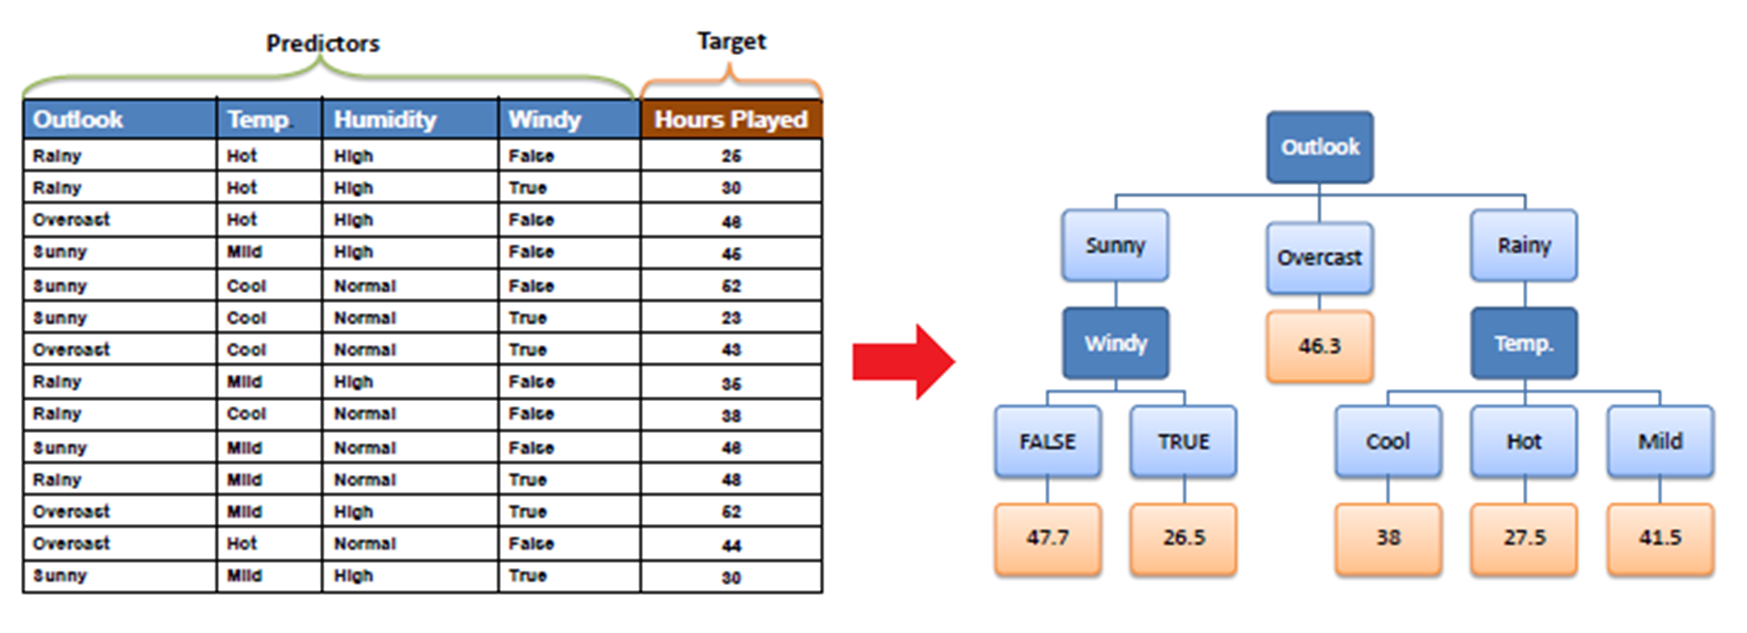

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

### Step 1 - Data Ingestion

In [2]:
import pandas as pd
df = pd.read_csv("PowerPlant.csv")
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


# Features 
1. AT - Atmospheric Tempreature degree celsius
2. V - Vaccum Pressure Pa
3. AP - Atmospheric Pressure Pa
4. RH - Relative Humidity %
5. PE - Energy output of plant in Mega Watts

PE is Target feature which is numeric in nature

### Step 2 - Perform Basic Data quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [5]:
df.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(41)

In [7]:
# Drop the duplicated
df = df.drop_duplicates(keep="first").reset_index(drop=True)

In [8]:
df.shape

(9527, 5)

### Step 3 - Seperate X and Y(PE)

In [9]:
X = df.drop(columns=["PE"])
Y = df[["PE"]]

In [10]:
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [11]:
Y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


### Step 4 - Apply Preprocessing on X

In [12]:
X.dtypes

AT    float64
V     float64
AP    float64
RH    float64
dtype: object

In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [15]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler()
).set_output(transform="pandas")

In [16]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,AT,V,AP,RH
0,-1.520448,-1.066041,-0.403535,1.141599
1,0.534897,0.330813,-0.309262,0.059223
2,1.354348,0.205475,-1.024725,-2.151400
3,-0.079020,-0.362884,-1.012941,0.236538
4,-1.055645,-1.074713,0.655349,1.633837


### Step 5 - Train Test Split

In [17]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)

In [18]:
xtrain.head()

,AT,V,AP,RH
5695,-0.152905,0.324507,0.089713,1.817999
7300,-1.497611,-1.153542,0.323712,0.908830
9066,-0.885038,-0.954892,0.293410,0.988245
6424,1.398679,1.223949,-0.479290,-1.082031
6773,-0.824586,-0.942279,0.796758,1.506499


In [19]:
ytrain.head()

,PE
5695,446.68
7300,483.54
9066,461.71
6424,437.38
6773,463.71


In [20]:
xtest.head()

,AT,V,AP,RH
1087,1.827212,1.120683,-0.125767,-1.414069
6308,-1.501641,-1.244984,0.044260,-0.467246
8021,-1.465370,-1.418408,0.399466,-1.082031
9483,0.150695,0.648495,0.731104,-0.002393
4459,-0.036032,1.128565,-0.361449,1.586599


In [21]:
ytest.head()

,PE
1087,429.38
6308,485.29
8021,480.40
9483,452.30
4459,446.47


In [22]:
xtrain.shape

(7621, 4)

In [23]:
xtest.shape

(1906, 4)

### Step 6 - Build the decsion tree

In [24]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(
    max_depth=1,
    min_samples_split=5,
    min_samples_leaf=5,
    criterion="squared_error"
)

model.fit(xtrain, ytrain)

DecisionTreeRegressor(max_depth=1, min_samples_leaf=5, min_samples_split=5)

In [25]:
# R2 score in train
model.score(xtrain, ytrain)

0.71765957297802

In [26]:
# R2 score in test
model.score(xtest, ytest)

0.7251450398190289

### Hyperparameter tuning

In [27]:
parmas = {
    "max_depth": [2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
    "min_samples_split": [5, 6, 7, 8, 9],
    "min_samples_leaf": [5, 6, 7, 8, 9],
    "criterion": ["squared_error", "absolute_error"]
}

In [39]:
9*5*5*2

450

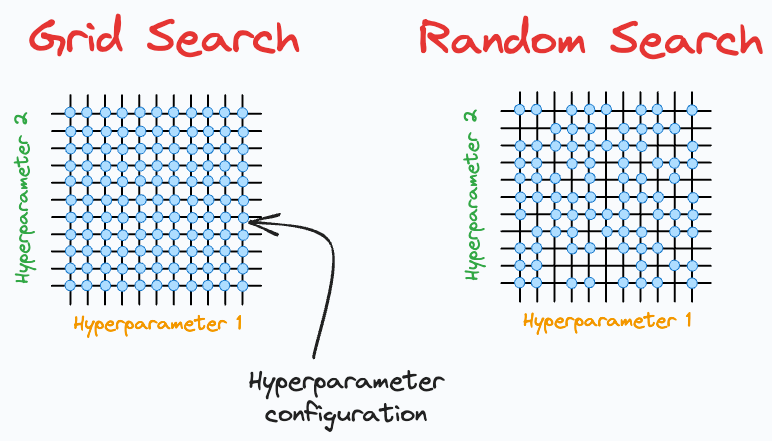

In [31]:
from sklearn.model_selection import RandomizedSearchCV

In [32]:
base_model = DecisionTreeRegressor()

rscv = RandomizedSearchCV(base_model, param_distributions=parmas, cv=5, scoring="neg_root_mean_squared_error")

rscv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11],
                                        'min_samples_leaf': [5, 6, 7, 8, 9],
                                        'min_samples_split': [5, 6, 7, 8, 9]},
                   scoring='neg_root_mean_squared_error')

In [33]:
rscv.best_params_

{'min_samples_split': 9,
 'min_samples_leaf': 6,
 'max_depth': 9,
 'criterion': 'squared_error'}

In [34]:
rscv.best_score_

np.float64(-4.141050751497062)

In [35]:
best_dtr = rscv.best_estimator_
best_dtr

DecisionTreeRegressor(max_depth=9, min_samples_leaf=6, min_samples_split=9)

[Scores for Tuning](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter)

### Step 7 - Evualuate model

In [37]:
best_dtr.score(xtrain, ytrain)

0.9611476235328569

In [38]:
best_dtr.score(xtest, ytest)

0.9487347298816569

In [43]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_dtr, xtrain, ytrain, cv=5, scoring="r2")

scores

array([0.94323176, 0.93860384, 0.9377244 , 0.93902922, 0.9427643 ])

In [44]:
scores.mean()

np.float64(0.940270702690651)

In [45]:
scores2 = cross_val_score(best_dtr, xtrain, ytrain, cv=5, scoring="neg_mean_absolute_error")

scores2

array([-2.96491751, -3.11884031, -3.01946523, -3.1237679 , -3.04814189])

In [46]:
scores2.mean()

np.float64(-3.055026568371983)

In [48]:
from sklearn.metrics import (
    root_mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score
)

In [49]:
def evaluate_model(model, x, y):
    ypred = model.predict(x)
    rmse = root_mean_squared_error(y, ypred)
    mae = mean_absolute_error(y, ypred)
    mape = mean_absolute_percentage_error(y, ypred)
    r2 = r2_score(y, ypred)
    print(f"RMSE : {rmse:.2f}")
    print(f"MAE : {mae:.2f}")
    print(f"MAPE : {mape:.2%}")
    print(f"R2 : {r2:.2%}")

In [50]:
print("Training Results")
evaluate_model(best_dtr, xtrain, ytrain)

Training Results
RMSE : 3.34
MAE : 2.46
MAPE : 0.54%
R2 : 96.11%


In [52]:
print("Testing Results")
evaluate_model(best_dtr, xtest, ytest)

Testing Results
RMSE : 3.93
MAE : 2.91
MAPE : 0.64%
R2 : 94.87%


### Above has r2 score > 0.8 hence it can be used out of sample prediction

### Plot the tree

In [53]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

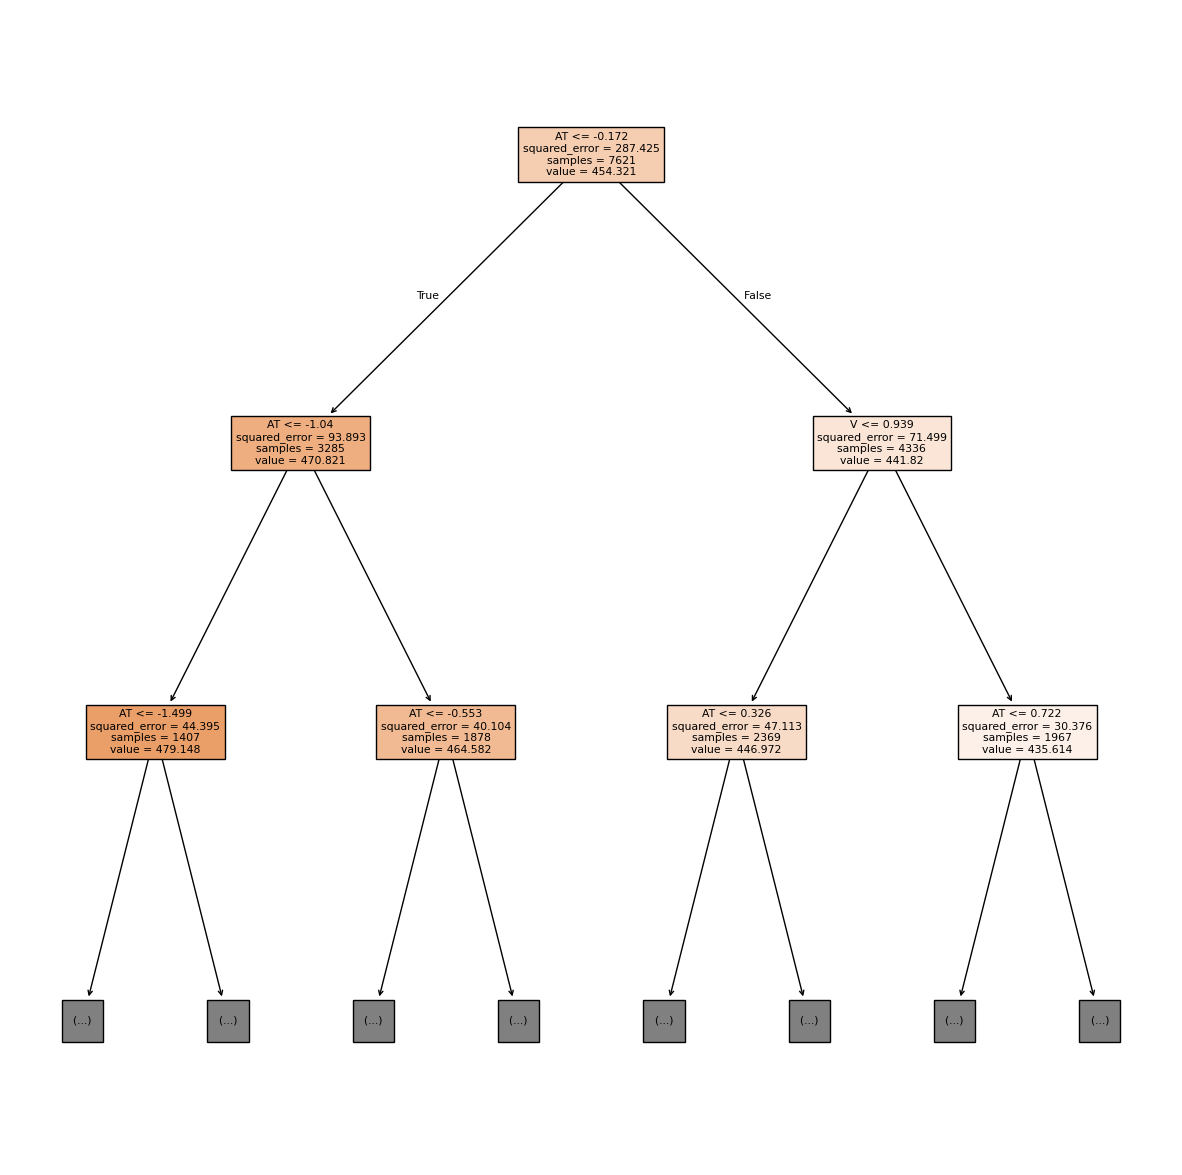

In [57]:
plt.figure(figsize=(15, 15))
plot_tree(best_dtr, feature_names=xtrain.columns, max_depth=2, filled=True)
plt.show()

In [58]:
best_dtr.feature_importances_

array([0.89560178, 0.08636209, 0.01044549, 0.00759064])

In [59]:
xtrain.columns

Index(['AT', 'V', 'AP', 'RH'], dtype='object')

In [60]:
imp = pd.Series(best_dtr.feature_importances_, index=xtrain.columns)
imp

AT    0.895602
V     0.086362
AP    0.010445
RH    0.007591
dtype: float64

In [61]:
imp.sort_values(ascending=False)

AT    0.895602
V     0.086362
AP    0.010445
RH    0.007591
dtype: float64

<Axes: >

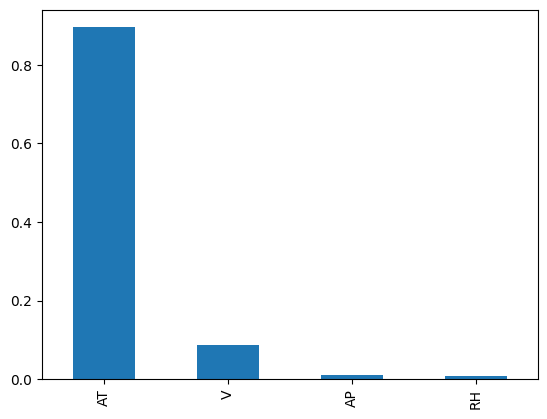

In [62]:
imp.sort_values(ascending=False).plot(kind="bar")

### Step 8 - Out of sample prediction

In [63]:
xnew = pd.read_csv("PowerPlantTest.csv")
xnew

,AT,V,AP,RH
0,25,51.5,1000.1,57.0
1,32,41.0,1051.1,80.0
2,28,NaN,1010.2,NaN


In [64]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [65]:
xnew_pre =  num_pipe.transform(xnew)
xnew_pre

,AT,V,AP,RH
0,0.717594,-0.220203,-2.211551,-1.118316
1,1.657948,-1.047911,6.373998,0.456299
2,1.120603,0.000000,-0.511275,0.000000


In [66]:
preds = best_dtr.predict(xnew_pre)

In [67]:
preds

array([444.45325581, 439.80611111, 438.23191489])

In [68]:
xnew["PE"] = preds
xnew

,AT,V,AP,RH,PE
0,25,51.5,1000.1,57.0,444.453256
1,32,41.0,1051.1,80.0,439.806111
2,28,NaN,1010.2,NaN,438.231915


In [69]:
xnew = xnew.round(2)

In [70]:
xnew

,AT,V,AP,RH,PE
0,25,51.5,1000.1,57.0,444.45
1,32,41.0,1051.1,80.0,439.81
2,28,NaN,1010.2,NaN,438.23


In [71]:
xnew.to_csv("results.csv", index=False)

### Save the model and preprocessor in joblib format

In [72]:
import joblib

joblib.dump(num_pipe, "pre.joblib")

['pre.joblib']

In [73]:
joblib.dump(best_dtr, "PowerModel.joblib")

['PowerModel.joblib']

## Load the models

In [74]:
p = joblib.load("pre.joblib")
p

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [75]:
m = joblib.load("PowerModel.joblib")
m

DecisionTreeRegressor(max_depth=9, min_samples_leaf=6, min_samples_split=9)